# Tugas Classification

## K-Nearest Neighbors

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## About Dataset

Dataset ini merupakan kumpulan data berisi 3 class masing-masing 50 instances

In [2]:
iris = "iris.data"
data_folder = "IrisData/"
ratings_name = data_folder + "iris.data"

In [3]:
iris_data = pd.read_csv(ratings_name,
                         delimiter = ",",
                         header=None,
                         names= ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"])
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C51C85518>]],
      dtype=object)

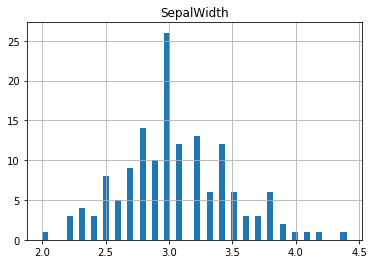

In [5]:
iris_data.hist(column='SepalWidth', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C53DF89B0>]],
      dtype=object)

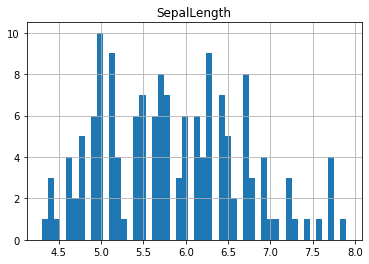

In [6]:
iris_data.hist(column='SepalLength', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C53EFEA58>]],
      dtype=object)

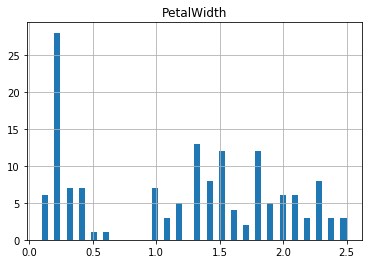

In [8]:
iris_data.hist(column='PetalWidth', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C53FE7208>]],
      dtype=object)

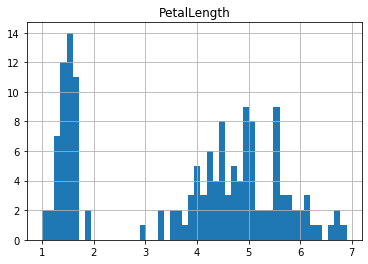

In [10]:
iris_data.hist(column='PetalLength', bins=50)

In [9]:
X = iris_data[['SepalLength', 'SepalWidth','PetalLength', 'PetalWidth']] .values  #.astype(float)
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
y = iris_data['Class'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [32]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [33]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9619047619047619
Test set Accuracy:  0.9555555555555556


In [34]:
# write your code here
from sklearn.neighbors import KNeighborsClassifier
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))



Train set Accuracy:  0.9809523809523809
Test set Accuracy:  0.9555555555555556


In [35]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.93333333, 0.95555556, 0.95555556, 0.95555556, 0.95555556,
       0.95555556, 0.95555556, 0.95555556, 0.95555556])

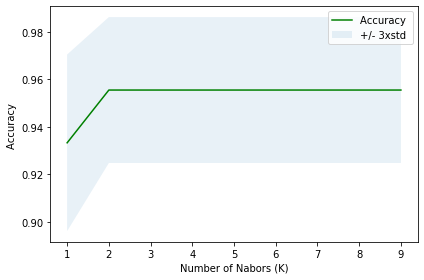

In [36]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [37]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9555555555555556 with k= 2
